In [12]:
import os
import pandas as pd
import re
import numpy as np
import os
import keras
import urllib.request
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from collections import Counter
from konlpy.tag import Mecab

from tensorflow import keras
from tensorflow.keras import layers


In [13]:
df = pd.read_csv('~/aiffel/DKTC/train.csv')

df.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [16]:
def check_class(it):
    if '협박' in it:
        return 0
    elif '갈취' in it:
        return 1
    elif '직장 내 괴롭힘' in it:
        return 2
    elif '기타 괴롭힘' in it:
        return 3
    else:
        return 4
df['label'] = df['class'].apply(lambda it: check_class(it))

df.head()

,idx,class,conversation,data,label
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,지금 너 스스로를 죽여달라고 애원하는 것인가 ? 아닙니다 . 죄송합니다 . 죽을 거...,0
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,길동경찰서입니다 . 시 분 마트에 폭발물을 설치할거다 . 네 ? 똑바로 들어 한번만...,0
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,너 되게 귀여운거 알지 ? 나보다 작은 남자는 첨봤어 . 그만해 . 니들 놀리는거 ...,3
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,어이 거기 예 ? ? 너 말이야 너 . 이리 오라고 무슨 일 . 너 옷 좋아보인다 ...,1
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,저기요 혹시 날이 너무 뜨겁잖아요 ? 저희 회사에서 이 선크림 파는데 한 번 손등에...,1


In [17]:
import re

def preprocess_sentence(sentence):
    
    sentence = sentence.lower().strip()
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Z?.!가-힣ㄱ-ㅎㅏ-ㅣ]+", " ", sentence)
    sentence = sentence.strip()
    
    return sentence
df['data'] = df['conversation'].apply(lambda it : preprocess_sentence(it))

df.head()

,idx,class,conversation,data,label
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,지금 너 스스로를 죽여달라고 애원하는 것인가 ? 아닙니다 . 죄송합니다 . 죽을 거...,0
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,길동경찰서입니다 . 시 분 마트에 폭발물을 설치할거다 . 네 ? 똑바로 들어 한번만...,0
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,너 되게 귀여운거 알지 ? 나보다 작은 남자는 첨봤어 . 그만해 . 니들 놀리는거 ...,3
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,어이 거기 예 ? ? 너 말이야 너 . 이리 오라고 무슨 일 . 너 옷 좋아보인다 ...,1
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,저기요 혹시 날이 너무 뜨겁잖아요 ? 저희 회사에서 이 선크림 파는데 한 번 손등에...,1


협박           896
갈취           981
직장 내 괴롭힘     979
기타 괴롭힘      1094
Name: idx, dtype: int64


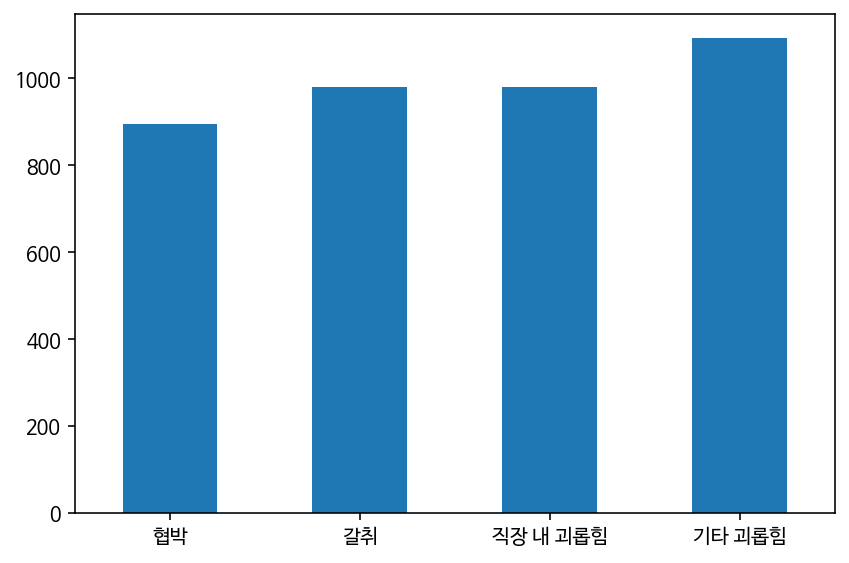

In [18]:
group_count = df.groupby("label").count().iloc[:,0]
group_count.index = ['협박', '갈취', '직장 내 괴롭힘',  '기타 괴롭힘']

print(group_count)

group_count.plot(kind="bar")
plt.xticks(rotation = 360)
plt.tight_layout()
plt.show()

In [19]:
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

label = df["class"]
sentence = df["data"]

# 데이터프레임 생성
df_boxplot = pd.DataFrame({"Class": label, "Sentence Length": [len(s) for s in sentence]})

문장의 최단 길이: 41
문장의 최장 길이: 909
문장의 평균 길이: 235


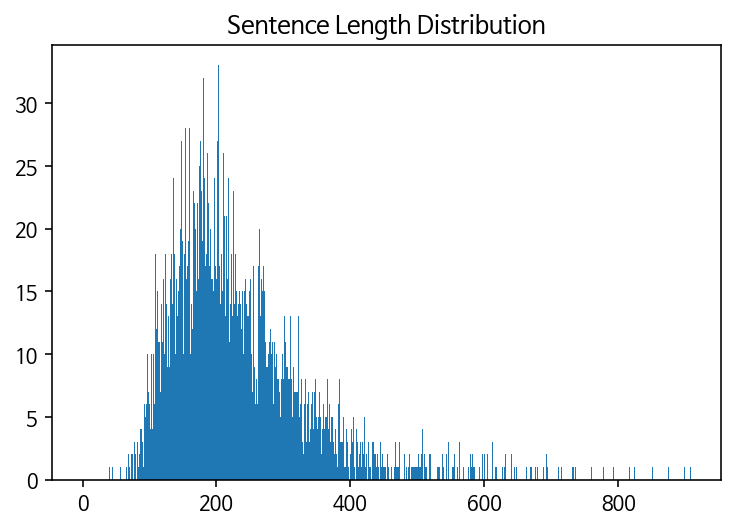

In [20]:
#최단 길이, 최장 길이, 평균 길이를 구한 후 문장 길이 분포를 막대그래프로 표현
min_len = 999
max_len = 0
sum_len = 0

raw = []
for sent in df['data']:
  raw.append(sent)

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [23]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [24]:
from transformers import TFBertForMaskedLM
from transformers import AutoTokenizer

In [25]:
HUGGINGFACE_MODEL_PATH = "klue/bert-base"

In [32]:
model = TFBertForMaskedLM.from_pretrained('klue/bert-base', from_pt=True)
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForMaskedLM: ['bert.embeddings.position_ids', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing TFBertForMaskedLM from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForMaskedLM from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForMaskedLM were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForMaskedLM for predictions without further training.


In [ ]:
# fine-tuning 진행 전 데이터 셋을 Tensorflow의 Dataset object로 변환
import tensorflow as tf

# trainset-set
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))

# validation-set
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

In [ ]:
from transformers import TFBertForSequenceClassification

num_labels = max(train["class"])
model = TFBertForSequenceClassification.from_pretrained(HUGGINGFACE_MODEL_PATH, num_labels=num_labels, from_pt=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback_earlystop = EarlyStopping(
    monitor="val_accuracy", 
    min_delta=0.001, # 빠른 종료 임계치
    patience=2)

model.fit(
    train_dataset.shuffle(1000).batch(16), epochs=5, batch_size=16,
    validation_data=val_dataset.shuffle(1000).batch(16),
    callbacks = [callback_earlystop]
)

In [ ]:
# 모델 저장 전 decoding
id2labels = model.config.id2label
model.config.id2label = {id : label_encoder.inverse_transform([int(re.sub('LABEL_', '', label))])[0]  for id, label in id2labels.items()}

label2ids = model.config.label2id
model.config.label2id = {label_encoder.inverse_transform([int(re.sub('LABEL_', '', label))])[0] : id   for id, label in id2labels.items()}

In [ ]:
MODEL_NAME = 'fine-tuned-klue-bert-base'
MODEL_SAVE_PATH = os.path.join("~/aiffel/DKTC/model", MODEL_NAME) # change this to your preferred location

if os.path.exists(MODEL_SAVE_PATH):
    print(f"{MODEL_SAVE_PATH} -- Folder already exists \n")
else:
    os.makedirs(MODEL_SAVE_PATH, exist_ok=True)
    print(f"{MODEL_SAVE_PATH} -- Folder create complete \n")

# save tokenizer, model
model.save_pretrained(MODEL_SAVE_PATH)
tokenizer.save_pretrained(MODEL_SAVE_PATH)

In [ ]:
from transformers import TextClassificationPipeline

# Load Fine-tuning model
loaded_tokenizer = BertTokenizerFast.from_pretrained(MODEL_SAVE_PATH)
loaded_model = TFBertForSequenceClassification.from_pretrained(MODEL_SAVE_PATH)

text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=loaded_model, 
    framework='tf',
    return_all_scores=True
)

In [ ]:
predicted_label_list = []
predicted_score_list = []

for text in test_df['text']:
    # predict
    preds_list = text_classifier(text)[0]

    sorted_preds_list = sorted(preds_list, key=lambda x: x['score'], reverse=True)
    predicted_label_list.append(sorted_preds_list[0]) # label
    predicted_score_list.append(sorted_preds_list[1]) # score
test_df['pred'] = predicted_label_list
test_df['score'] = predicted_score_list
test_df.head()

In [ ]:
from sklearn.metrics import classification_report

y_pred = [int(label[-1]) for label in predicted_label_list]
y_true = y_test
print(classification_report(y_true, y_pred))